In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
import joblib

In [290]:
df = pd.read_csv("./data/Diabetes_prediction.csv")
df

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0              2  115.863387      56.410731      24.336736   94.385783   
1              2   92.490122      70.615520      23.443591  138.652426   
2              1   88.141469      63.262618      23.404364  149.358082   
3              2  108.453101      67.793632      20.751580  108.751638   
4              1  127.849443      94.725685      22.603078   25.269987   
..           ...         ...            ...            ...         ...   
995            1  103.496355      41.059401      24.930299   43.675978   
996            1   60.714150      64.082842      24.689064  111.562745   
997            0   97.597727      64.122312      22.140339  108.138552   
998            0   66.775137      55.908797      24.885274  219.521484   
999            0   87.647268      69.111593      25.621266  134.335745   

           BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0    26.455940                  0.272682  20.100494          0  
1    23.910167                  0.665160  44.912281          0  
2    21.948250                  0.676022  48.247873          1  
3    24.209304                  0.289636  42.749868          0  
4    32.997477                  0.601315  32.797789          0  
..         ...                       ...        ...        ...  
995  25.846062                  0.455884  19.905419          0  
996  19.464280                  0.250560  44.421874          1  
997  22.733052                  0.761463  58.949800          1  
998  31.819187                  0.382877  46.928923          0  
999  31.098746                  0.605828  41.785889          1  

[1000 rows x 9 columns]

In [291]:
df.head()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
0            2  115.863387      56.410731      24.336736   94.385783   
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
0  26.455940                  0.272682  20.100494          0  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0

In [292]:
df.tail()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
995            1  103.496355      41.059401      24.930299   43.675978   
996            1   60.714150      64.082842      24.689064  111.562745   
997            0   97.597727      64.122312      22.140339  108.138552   
998            0   66.775137      55.908797      24.885274  219.521484   
999            0   87.647268      69.111593      25.621266  134.335745   

           BMI  DiabetesPedigreeFunction        Age  Diagnosis  
995  25.846062                  0.455884  19.905419          0  
996  19.464280                  0.250560  44.421874          1  
997  22.733052                  0.761463  58.949800          1  
998  31.819187                  0.382877  46.928923          0  
999  31.098746                  0.605828  41.785889          1

### The dataset contains the data for the following features to help us predict whether a person is diabetic or not:

    Pregnancies: Number of times pregnant

    Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
    
    BloodPressure: Diastolic blood pressure (mm Hg)
    
    SkinThickness: Triceps skin fold thickness (mm)
    
    Insulin: 2-Hour serum insulin (mu U/ml)
    
    BMI: Body mass index (weight in kg/(height in m)2)
    
    DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
    
    Age: Age (years)
    
    Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Diagnosis                 1000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [294]:
df.describe()

Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1000.000000  1000.000000    1000.000000    1000.000000  1000.000000   
mean      1.771000    99.440607      72.179837      23.278316    84.582679   
std       1.354398    19.470730      13.882017       1.173807    74.872733   
min       0.000000    30.571402      31.401487      19.369987  -165.310033   
25%       1.000000    86.145927      62.795447      22.501591    35.076535   
50%       2.000000    99.458362      71.909588      23.275225    84.442232   
75%       3.000000   113.264556      82.082660      24.052022   134.267842   
max       8.000000   161.238939     110.723715      26.917654   317.701852   

               BMI  DiabetesPedigreeFunction          Age   Diagnosis  
count  1000.000000               1000.000000  1000.000000  1000.00000  
mean     25.433600                  0.449383    43.281798     0.30600  
std       3.690223                  0.199334    14.465398     0.46106  
min      13.548818                  0.100037    -0.979804     0.00000  
25%      23.022715                  0.283376    33.518451     0.00000  
50%      25.455649                  0.448219    43.634273     0.00000  
75%      27.972184                  0.619158    53.098446     1.00000  
max      36.324598                  0.799654    90.573782     1.00000

In [295]:
df = df[df['Age'] >= 21]
df.head()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
1            2   92.490122      70.615520      23.443591  138.652426   
2            1   88.141469      63.262618      23.404364  149.358082   
3            2  108.453101      67.793632      20.751580  108.751638   
4            1  127.849443      94.725685      22.603078   25.269987   
5            2  108.870034      74.338518      25.390851   78.704740   

         BMI  DiabetesPedigreeFunction        Age  Diagnosis  
1  23.910167                  0.665160  44.912281          0  
2  21.948250                  0.676022  48.247873          1  
3  24.209304                  0.289636  42.749868          0  
4  32.997477                  0.601315  32.797789          0  
5  20.008180                  0.673117  24.893761          0

In [296]:
def count_values(data):
    positives = (data > 0).sum()
    negatives = (data < 0).sum()
    zeros = (data == 0).sum()
    return pd.Series([positives, negatives, zeros], index=['Positives', 'Negatives', 'Zeros'])

# Apply the function to each column in the DataFrame
value_counts = df.apply(count_values)
value_counts


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Positives          766      930            930            930      812  930   
Negatives            0        0              0              0      118    0   
Zeros              164        0              0              0        0    0   

           DiabetesPedigreeFunction  Age  Diagnosis  
Positives                       930  930        283  
Negatives                         0    0          0  
Zeros                             0    0        647

In [297]:
df['Insulin'] = df['Insulin'].apply(lambda x: abs(x) if x < 0 else x)

# Verify the changes by checking for any remaining negative values
negative_insulin_count = (df['Insulin'] < 0).sum()

/var/folders/1k/6tgzt4fj5lz2lfymwzmv_zb00000gn/T/ipykernel_71891/3921461435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insulin'] = df['Insulin'].apply(lambda x: abs(x) if x < 0 else x)


In [298]:
def count_values(data):
    positives = (data > 0).sum()
    negatives = (data < 0).sum()
    zeros = (data == 0).sum()
    return pd.Series([positives, negatives, zeros], index=['Positives', 'Negatives', 'Zeros'])

# Apply the function to each column in the DataFrame
value_counts = df.apply(count_values)
value_counts

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Positives          766      930            930            930      930  930   
Negatives            0        0              0              0        0    0   
Zeros              164        0              0              0        0    0   

           DiabetesPedigreeFunction  Age  Diagnosis  
Positives                       930  930        283  
Negatives                         0    0          0  
Zeros                             0    0        647

In [299]:
df['Age'] = df['Age'].apply(lambda x: abs(x) if x < 0 else x)

# Verify the changes by checking for any remaining negative values
negative_insulin_count = (df['Age'] < 0).sum()
negative_insulin_count

/var/folders/1k/6tgzt4fj5lz2lfymwzmv_zb00000gn/T/ipykernel_71891/3872991183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lambda x: abs(x) if x < 0 else x)


0

In [300]:
value_counts = df.apply(count_values)
value_counts

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
Positives          766      930            930            930      930  930   
Negatives            0        0              0              0        0    0   
Zeros              164        0              0              0        0    0   

           DiabetesPedigreeFunction  Age  Diagnosis  
Positives                       930  930        283  
Negatives                         0    0          0  
Zeros                             0    0        647

In [301]:
df.isna()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
5          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
994        False    False          False          False    False  False   
996        False    False          False          False    False  False   
997        False    False          False          False    False  False   
998        False    False          False          False    False  False   
999        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Diagnosis  
1                       False  False      False  
2                       False  False      False  
3                       False  False      False  
4                       False  False      False  
5                       False  False      False  
..                        ...    ...        ...  
994                     False  False      False  
996                     False  False      False  
997                     False  False      False  
998                     False  False      False  
999                     False  False      False  

[930 rows x 9 columns]

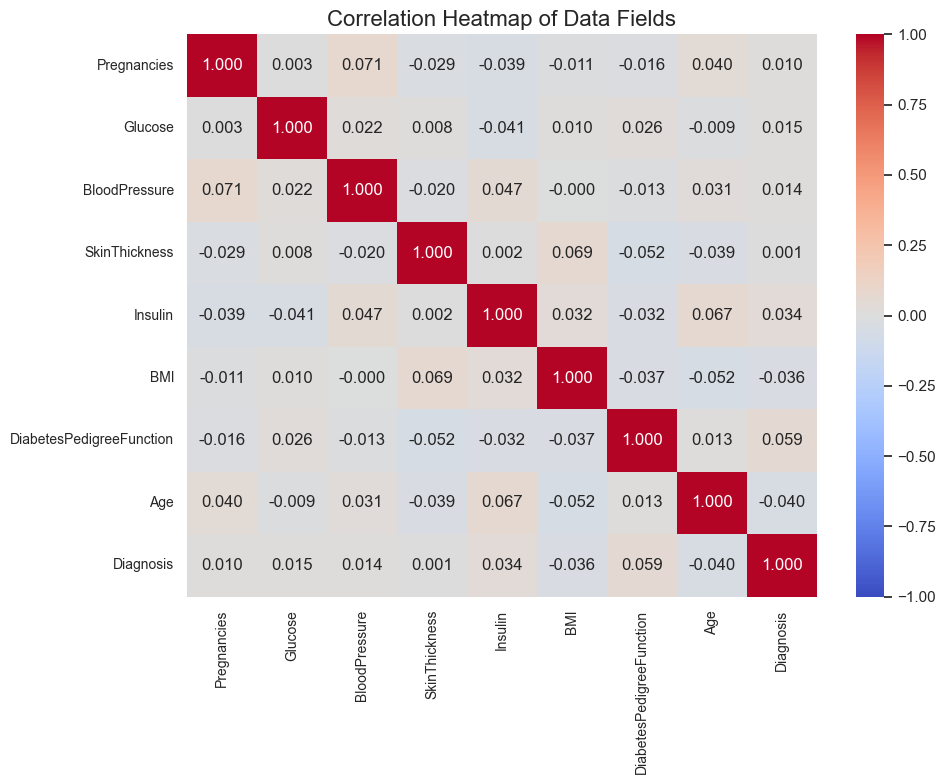

In [302]:


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".3f", vmin=-1, vmax=1, annot_kws={"size": 12})
heatmap.set_title('Correlation Heatmap of Data Fields', fontsize=16)
heatmap.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()  # Adjust layout
plt.show()


In [303]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.002733       0.070637      -0.029007   
Glucose                      0.002733  1.000000       0.022084       0.007927   
BloodPressure                0.070637  0.022084       1.000000      -0.020101   
SkinThickness               -0.029007  0.007927      -0.020101       1.000000   
Insulin                     -0.039454 -0.040790       0.047292       0.002000   
BMI                         -0.010508  0.009951      -0.000402       0.069011   
DiabetesPedigreeFunction    -0.016412  0.025518      -0.013406      -0.052059   
Age                          0.040319 -0.008590       0.030968      -0.038938   
Diagnosis                    0.010098  0.015210       0.014116       0.001211   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.039454 -0.010508                 -0.016412   
Glucose                  -0.040790  0.009951                  0.025518   
BloodPressure             0.047292 -0.000402                 -0.013406   
SkinThickness             0.002000  0.069011                 -0.052059   
Insulin                   1.000000  0.031525                 -0.032335   
BMI                       0.031525  1.000000                 -0.036810   
DiabetesPedigreeFunction -0.032335 -0.036810                  1.000000   
Age                       0.067004 -0.052227                  0.013348   
Diagnosis                 0.034079 -0.035769                  0.059331   

                               Age  Diagnosis  
Pregnancies               0.040319   0.010098  
Glucose                  -0.008590   0.015210  
BloodPressure             0.030968   0.014116  
SkinThickness            -0.038938   0.001211  
Insulin                   0.067004   0.034079  
BMI                      -0.052227  -0.035769  
DiabetesPedigreeFunction  0.013348   0.059331  
Age                       1.000000  -0.040267  
Diagnosis                -0.040267   1.000000

In [304]:
df_corr = df.corr()['Diagnosis']
df_corr

Pregnancies                 0.010098
Glucose                     0.015210
BloodPressure               0.014116
SkinThickness               0.001211
Insulin                     0.034079
BMI                        -0.035769
DiabetesPedigreeFunction    0.059331
Age                        -0.040267
Diagnosis                   1.000000
Name: Diagnosis, dtype: float64

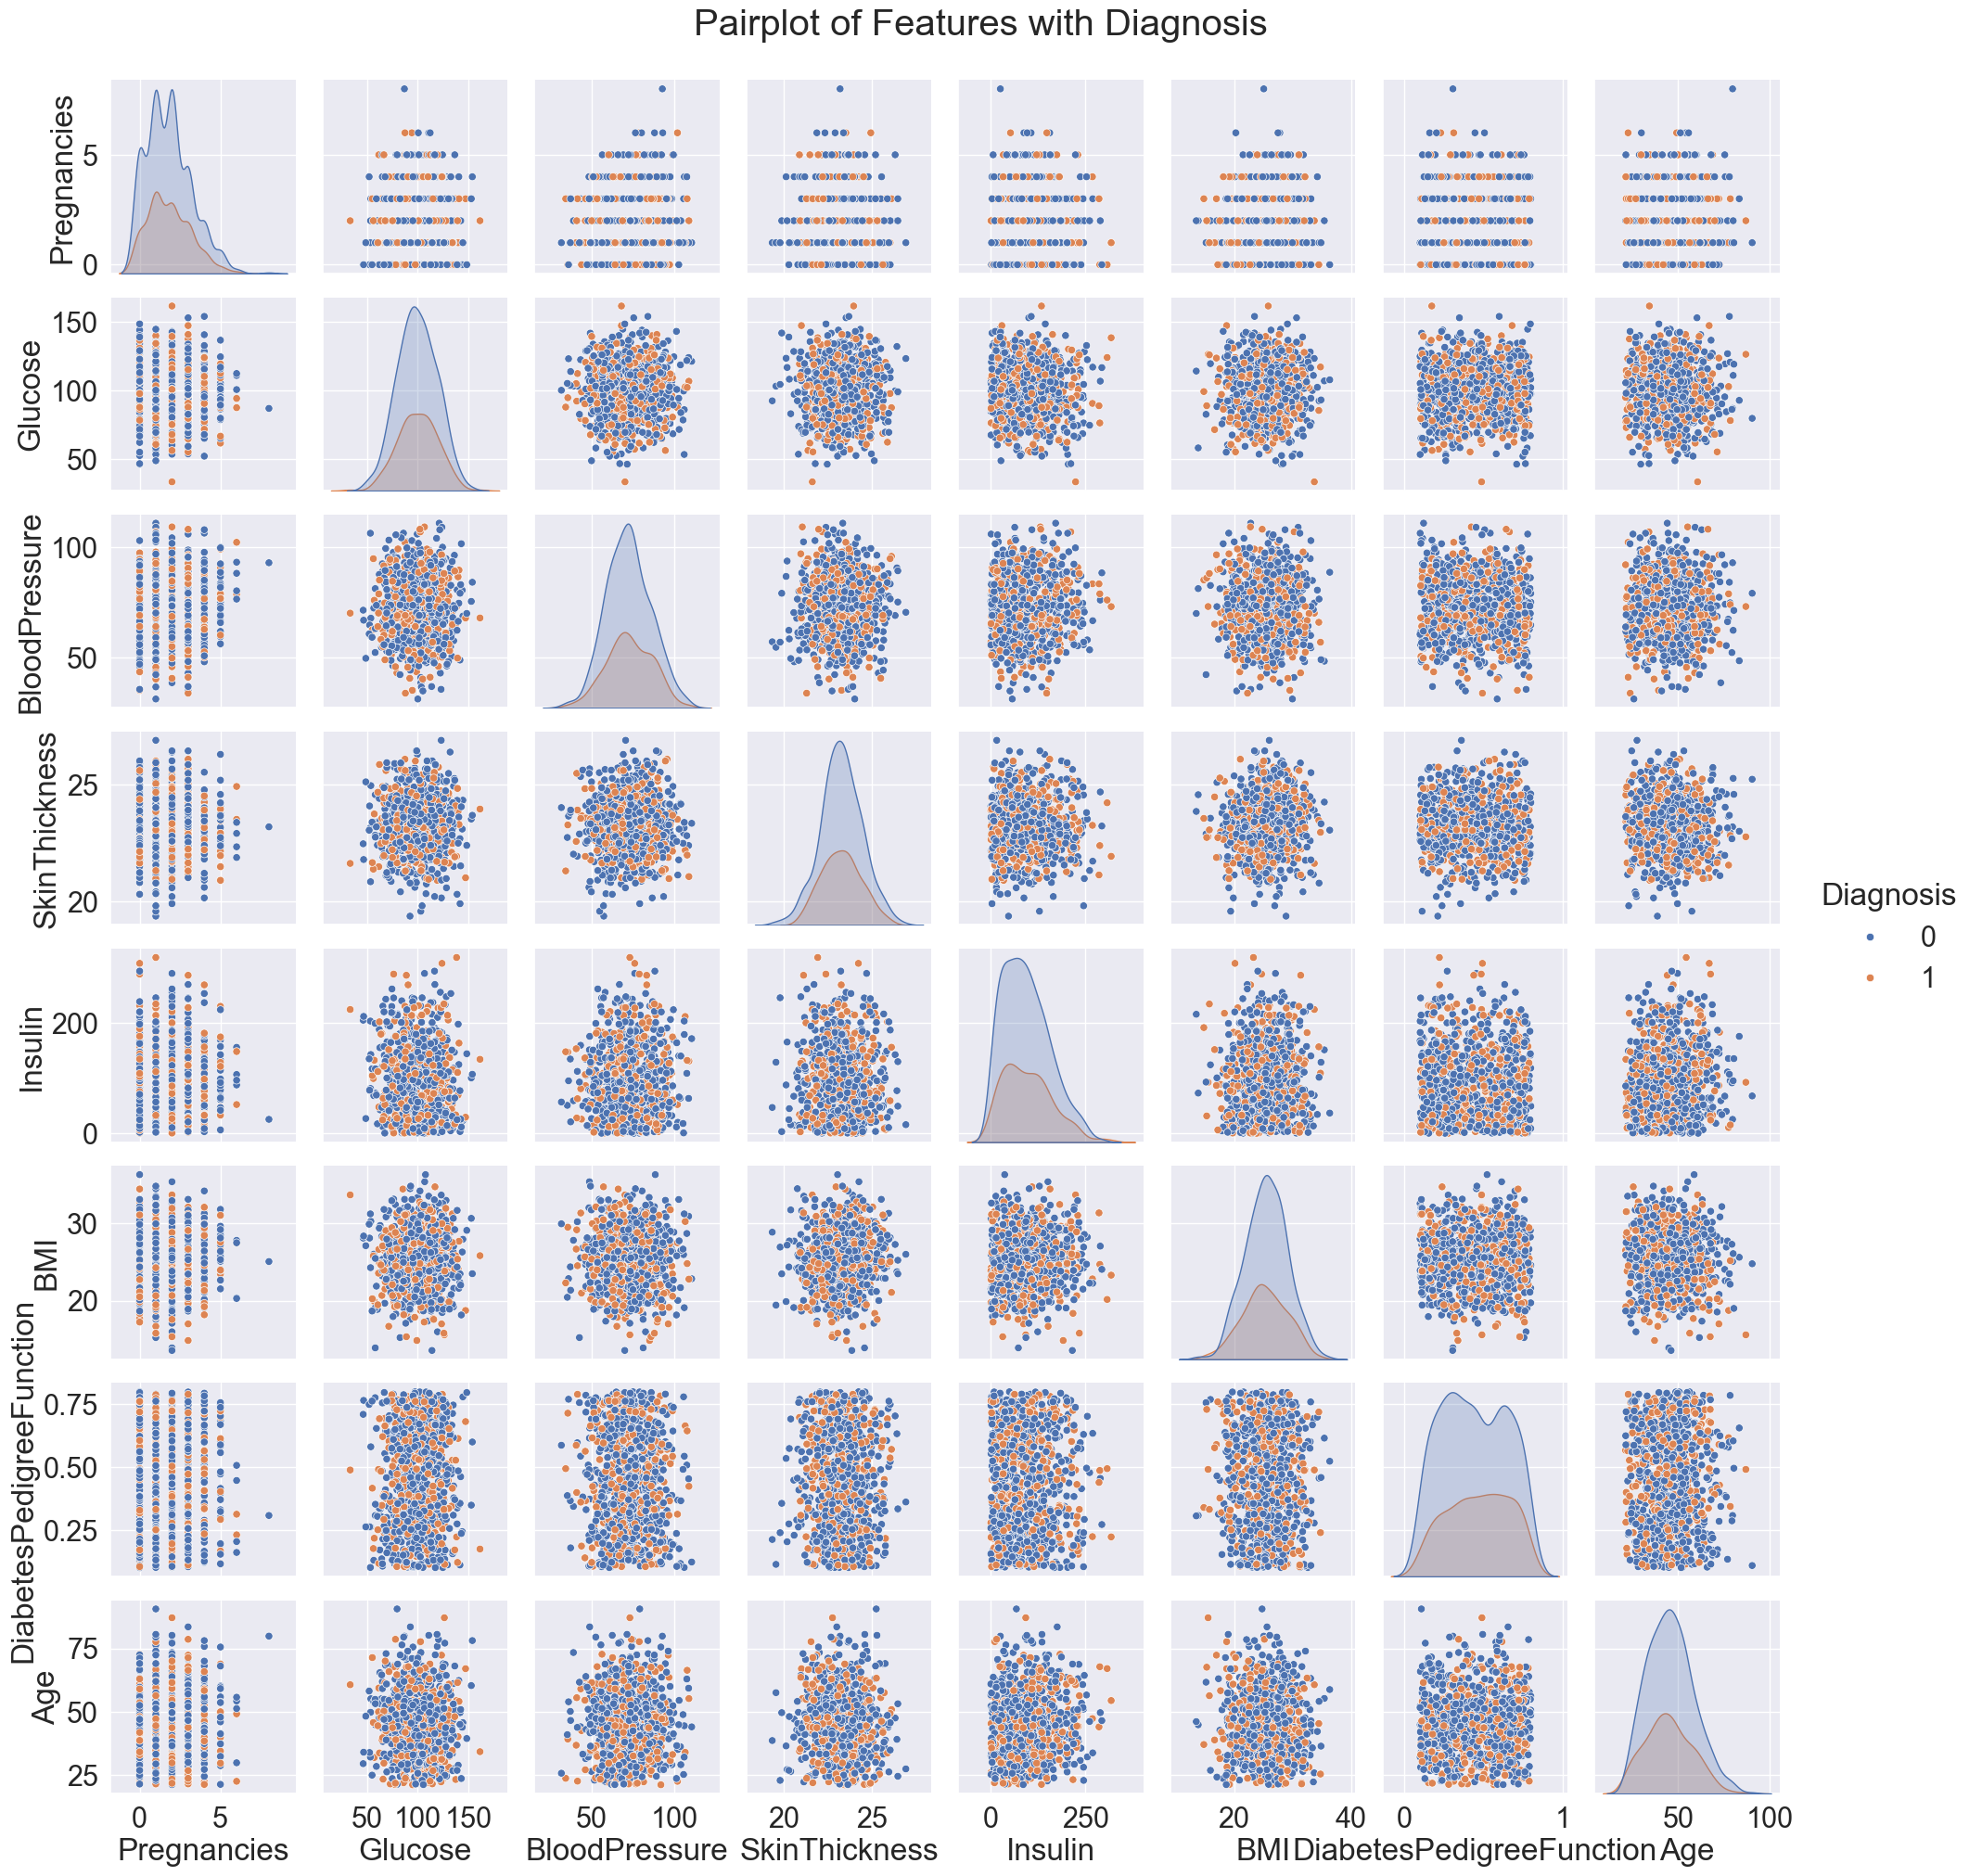

In [305]:
sns.set(font_scale=2)
pairplot = sns.pairplot(df, hue='Diagnosis', )

# Add a title
pairplot.fig.suptitle("Pairplot of Features with Diagnosis", y=1.02)
plt.show()

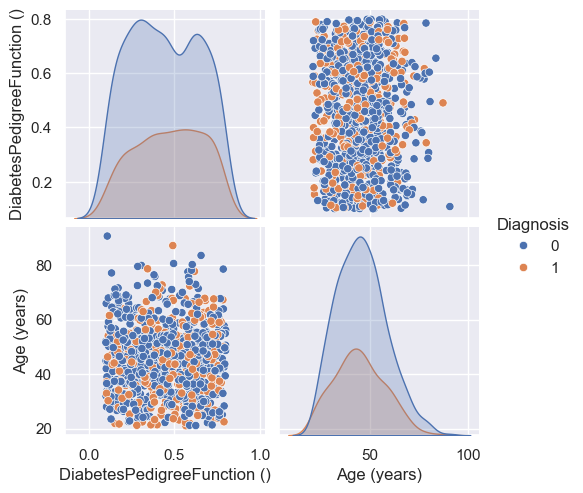

In [306]:
units = {
    'Age': 'years',
}

# Set font scale
sns.set(font_scale=1)

# Specify the variables of interest
variables_of_interest = ['DiabetesPedigreeFunction', 'Age', 'Diagnosis']

# Create pair plot for the specified variables
pairplot = sns.pairplot(df[variables_of_interest], hue='Diagnosis')

# Add units to the axes labels
for ax in pairplot.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    ax.set_xlabel(f"{xlabel} ({units.get(xlabel, '')})")
    ax.set_ylabel(f"{ylabel} ({units.get(ylabel, '')})")

# Show the plot
plt.show()


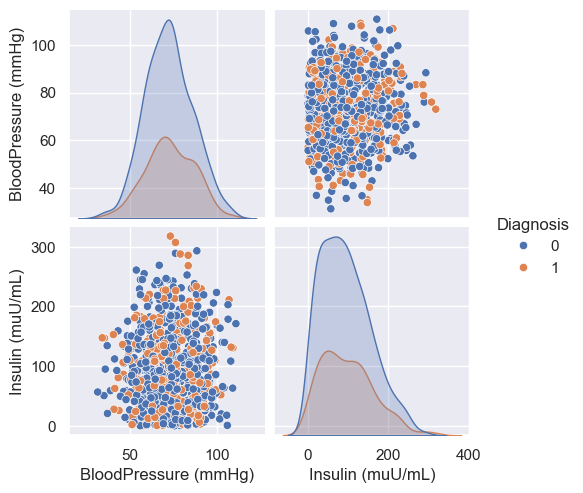

In [307]:
units = {
    'BloodPressure': 'mmHg',
    'Insulin': 'muU/mL'
}

# Set font scale
sns.set(font_scale=1)

# Specify the variables of interest
variables_of_interest = ['BloodPressure', 'Insulin', 'Diagnosis']

# Create pair plot for the specified variables
pairplot = sns.pairplot(df[variables_of_interest], hue='Diagnosis')

# Add units to the axes labels
for ax in pairplot.axes.flat:
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()
    ax.set_xlabel(f"{xlabel} ({units.get(xlabel, '')})")
    ax.set_ylabel(f"{ylabel} ({units.get(ylabel, '')})")

# Show the plot
plt.show()

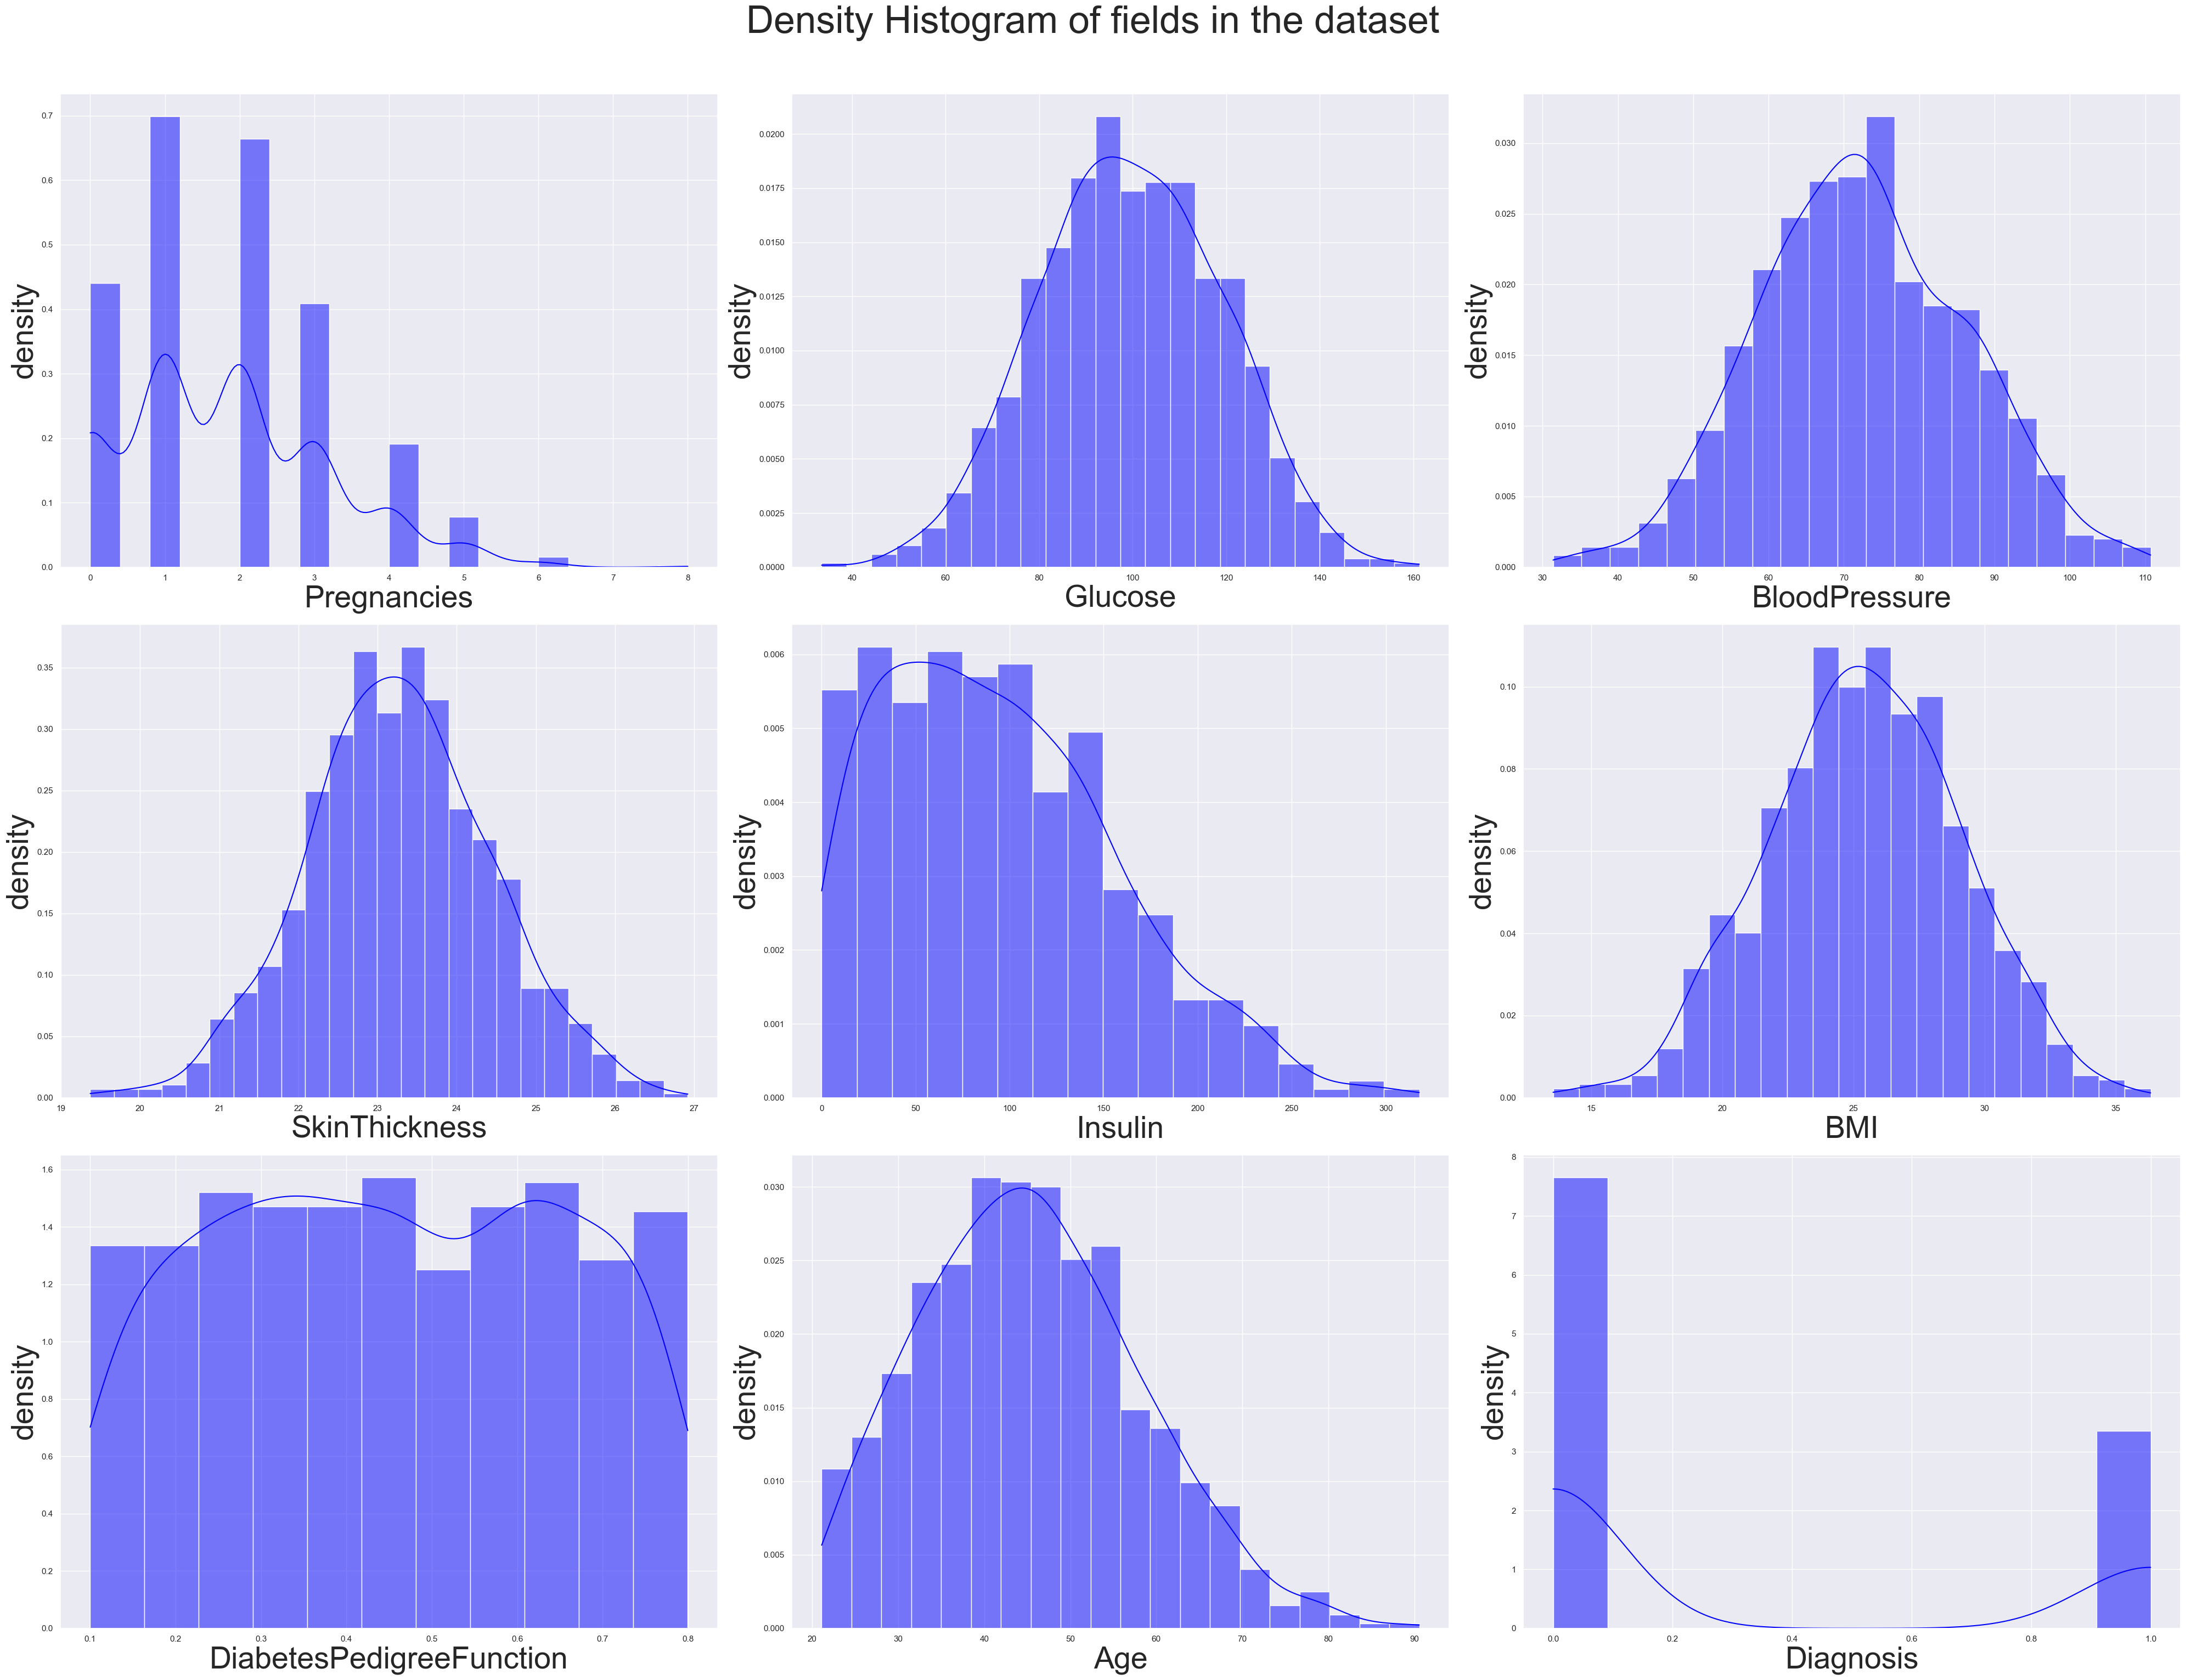

In [308]:
fig , axes = plt.subplots(3,3,figsize=(40,30))
index = 0
axes = axes.flatten()
for col , val in df.items():
    col_dist = sns.histplot(val , ax = axes[index] , kde = True , color = 'blue' , stat="density")
    col_dist.set_xlabel(col, fontsize=40)  
    col_dist.set_ylabel('density', fontsize=40)  
    index += 1  
fig.suptitle("Density Histogram of fields in the dataset", fontsize=50, y=1.02)
plt.tight_layout()

/var/folders/1k/6tgzt4fj5lz2lfymwzmv_zb00000gn/T/ipykernel_71891/1765810255.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=var, ax=axes[i], palette="Set2", showfliers=True)
/var/folders/1k/6tgzt4fj5lz2lfymwzmv_zb00000gn/T/ipykernel_71891/1765810255.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=var, ax=axes[i], palette="Set2", showfliers=True)
/var/folders/1k/6tgzt4fj5lz2lfymwzmv_zb00000gn/T/ipykernel_71891/1765810255.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=var, ax=axes[i], palette="S

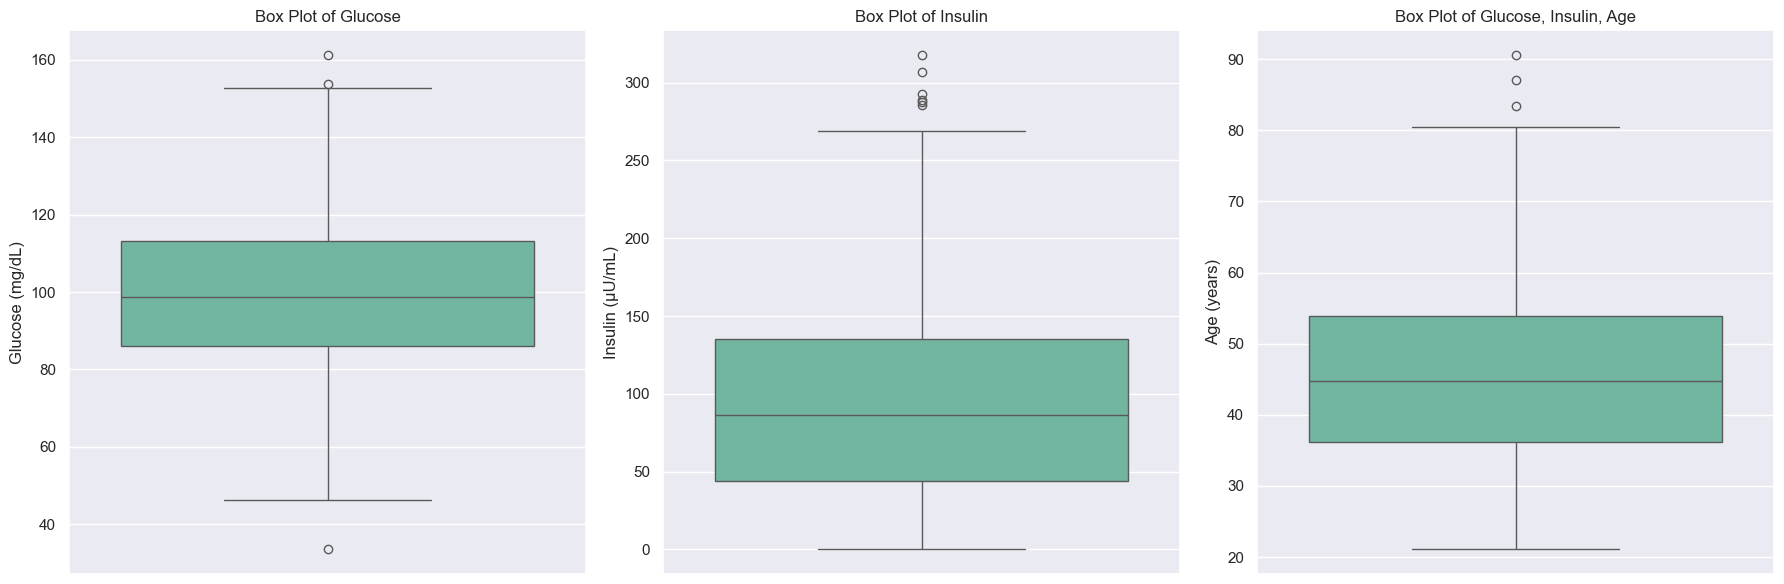

In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define units for variables
units = {
    'Glucose': 'mg/dL',  # Example units for glucose
    'Insulin': 'µU/mL',  # Example units for insulin
    'Age': 'years'  # Example units for age
}

selected_variables = ['Glucose', 'Insulin', 'Age']

# Creating separate subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Loop through the variables and create a box plot for each
for i, var in enumerate(selected_variables):
    sns.boxplot(data=df, y=var, ax=axes[i], palette="Set2", showfliers=True)
    axes[i].set_title(f"Box Plot of {var}")
    axes[i].set_ylabel(f"{var} ({units[var]})")
    axes[i].set_xlabel('')

# Adjust the layout
plt.title('Box Plot of Glucose, Insulin, Age')
plt.tight_layout()
plt.show()


In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import joblib

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.spatial import ConvexHull

from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans


In [271]:
features = df.columns[:-1]  # Adjust as per your dataset
x = df.loc[:, features].values
y = df.loc[:, 'Diagnosis'].values  # Adjust the column name as per your dataset

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components
principalComponents = pca.fit_transform(x_scaled)


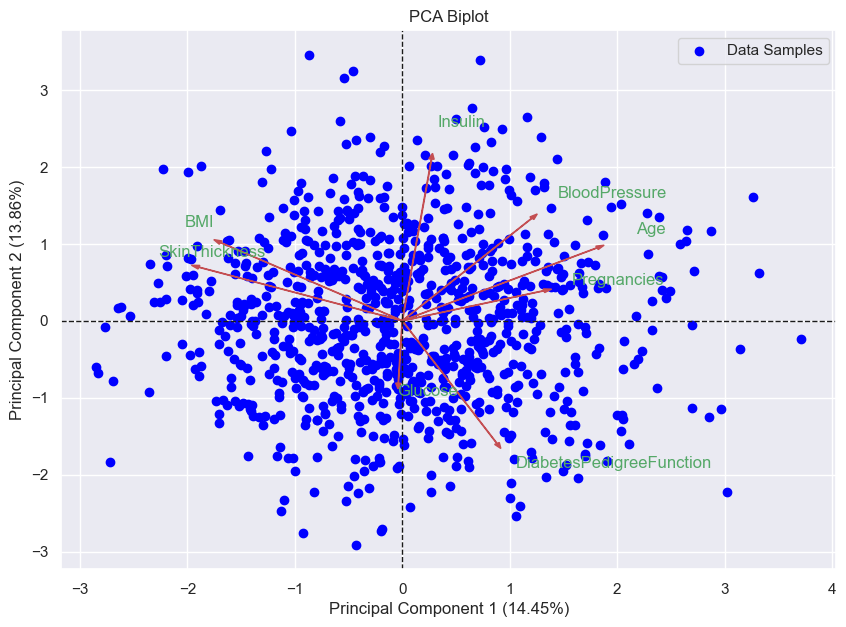

In [272]:
# Create a DataFrame from the PCA output
pca_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
pca_df['Diagnosis'] = y  # Or your target variable

# Plot initialization
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='blue', label='Data Samples')

# Plotting the projection of the original features along the components
for i, feature in enumerate(features):
    plt.arrow(0, 0, pca.components_[0, i] * max(pca_df['PC1']), pca.components_[1, i] * max(pca_df['PC2']),
              color='r', width=0.005, head_width=0.05)
    plt.text(pca.components_[0, i] * max(pca_df['PC1']) * 1.2, pca.components_[1, i] * max(pca_df['PC2']) * 1.2,
             feature, color='g')

plt.xlabel("Principal Component 1 ({}%)".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Principal Component 2 ({}%)".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('PCA Biplot')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--', lw=1)
plt.axvline(x=0, color='k', linestyle='--', lw=1)
plt.legend()
plt.show()


In [273]:
pca_df

PC1       PC2  Diagnosis
0    0.407728 -0.113559          0
1    0.388027 -0.362938          1
2    0.911178 -0.299846          0
3   -0.733641 -0.583626          0
4   -0.715101 -1.216096          0
..        ...       ...        ...
925  1.524163 -0.211891          1
926 -0.529899  0.545074          1
927  1.063982 -1.057945          1
928 -2.224410  1.978104          0
929 -2.189188  0.713712          1

[930 rows x 3 columns]

In [274]:
pca_df
X = pca_df[['PC1', 'PC2']]
X

PC1       PC2
0    0.407728 -0.113559
1    0.388027 -0.362938
2    0.911178 -0.299846
3   -0.733641 -0.583626
4   -0.715101 -1.216096
..        ...       ...
925  1.524163 -0.211891
926 -0.529899  0.545074
927  1.063982 -1.057945
928 -2.224410  1.978104
929 -2.189188  0.713712

[930 rows x 2 columns]

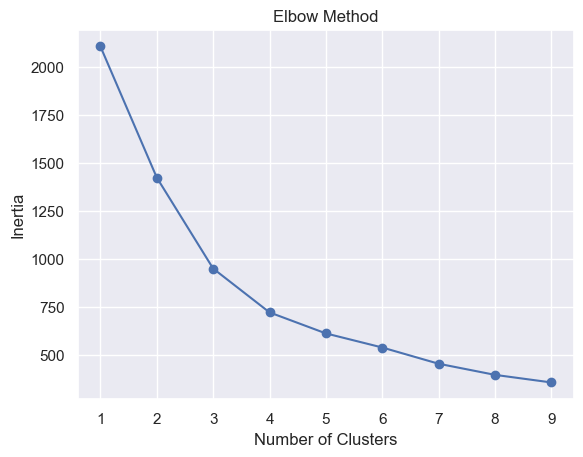

In [275]:

inertia = []
range_values = range(1, 10)  # Testing 1 through 9 clusters

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)  # No need for scaled data
    inertia.append(kmeans.inertia_)

plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [276]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)  # No scaling needed here

# Assign clusters back to our DataFrame
pca_df['cluster'] = kmeans.labels_


(-3.175367585976473, 4.039114604667913, -3.2281450250274197, 3.776124697249466)

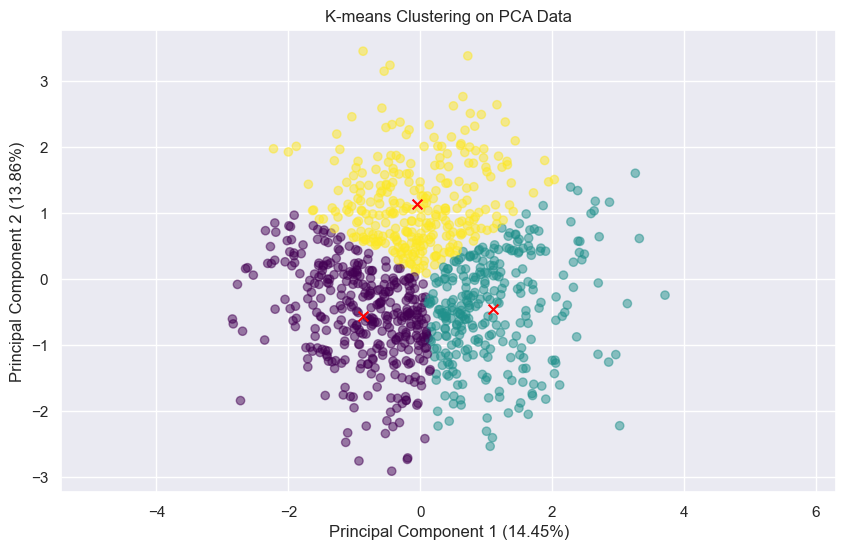

In [277]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', marker='o', alpha=0.5)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, marker='x')  # Cluster centers
plt.title('K-means Clustering on PCA Data')
plt.xlabel("Principal Component 1 ({}%)".format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel("Principal Component 2 ({}%)".format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.axis('equal')

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
for feature in X.columns:
   
    new_X = X[[feature]]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = linear_regression.predict(X_test)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    
   
    print(f"Feature: {feature}")
    print(f"Coefficient: {linear_regression.coef_}")
    print(f"Intercept: {linear_regression.intercept_}")
    print(f"Mean Squared Error: {mse}")

Feature: Pregnancies
Coefficient: [-0.00033783]
Intercept: 0.31377731721404295
Mean Squared Error: 0.1985445010697738
Feature: Glucose
Coefficient: [0.00077291]
Intercept: 0.2358759951404234
Mean Squared Error: 0.19942531910682523
Feature: BloodPressure
Coefficient: [6.2788987e-05]
Intercept: 0.30863461499124384
Mean Squared Error: 0.19847331720816716
Feature: SkinThickness
Coefficient: [0.01114471]
Intercept: 0.053697545218214626
Mean Squared Error: 0.1999797133749224
Feature: Insulin
Coefficient: [0.00015303]
Intercept: 0.2985207532294262
Mean Squared Error: 0.197827956130146
Feature: BMI
Coefficient: [-0.00408052]
Intercept: 0.41739073762838746
Mean Squared Error: 0.19816680243869628
Feature: DiabetesPedigreeFunction
Coefficient: [0.13243645]
Intercept: 0.2542836391408048
Mean Squared Error: 0.19770186938296885
Feature: Age
Coefficient: [-0.00095484]
Intercept: 0.3564713100947105
Mean Squared Error: 0.1976072934963763


In [279]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

subset_col1 =  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis']
subset_df = df[subset_col1]
subset_df = subset_df.dropna()
# subset_df = pd.get_dummies(subset_df, columns=['sex'], drop_first=True)
# codes, uniques = pd.factorize(subset_df['cabin'])
# subset_df['cabin'] = codes
X = subset_df[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y = subset_df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predicts = model.predict(X_test)
accuracy = accuracy_score(y_test, predicts)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6738351254480287


In [280]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diagnosis'],
      dtype='object')


In [281]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
best_model = grid.best_estimator_


        

In [282]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicts)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[188   0]
 [ 91   0]]


In [283]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, predicts, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.81       188
           1       0.00      0.00      0.00        91

    accuracy                           0.67       279
   macro avg       0.34      0.50      0.40       279
weighted avg       0.45      0.67      0.54       279



In [284]:
df['Diagnosis']

1      0
2      1
3      0
4      0
5      0
      ..
994    1
996    1
997    1
998    0
999    1
Name: Diagnosis, Length: 930, dtype: int64

Accuracy: 56.45%
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       123
           1       0.35      0.35      0.35        63

    accuracy                           0.56       186
   macro avg       0.51      0.51      0.51       186
weighted avg       0.56      0.56      0.56       186

[[83 40]
 [41 22]]


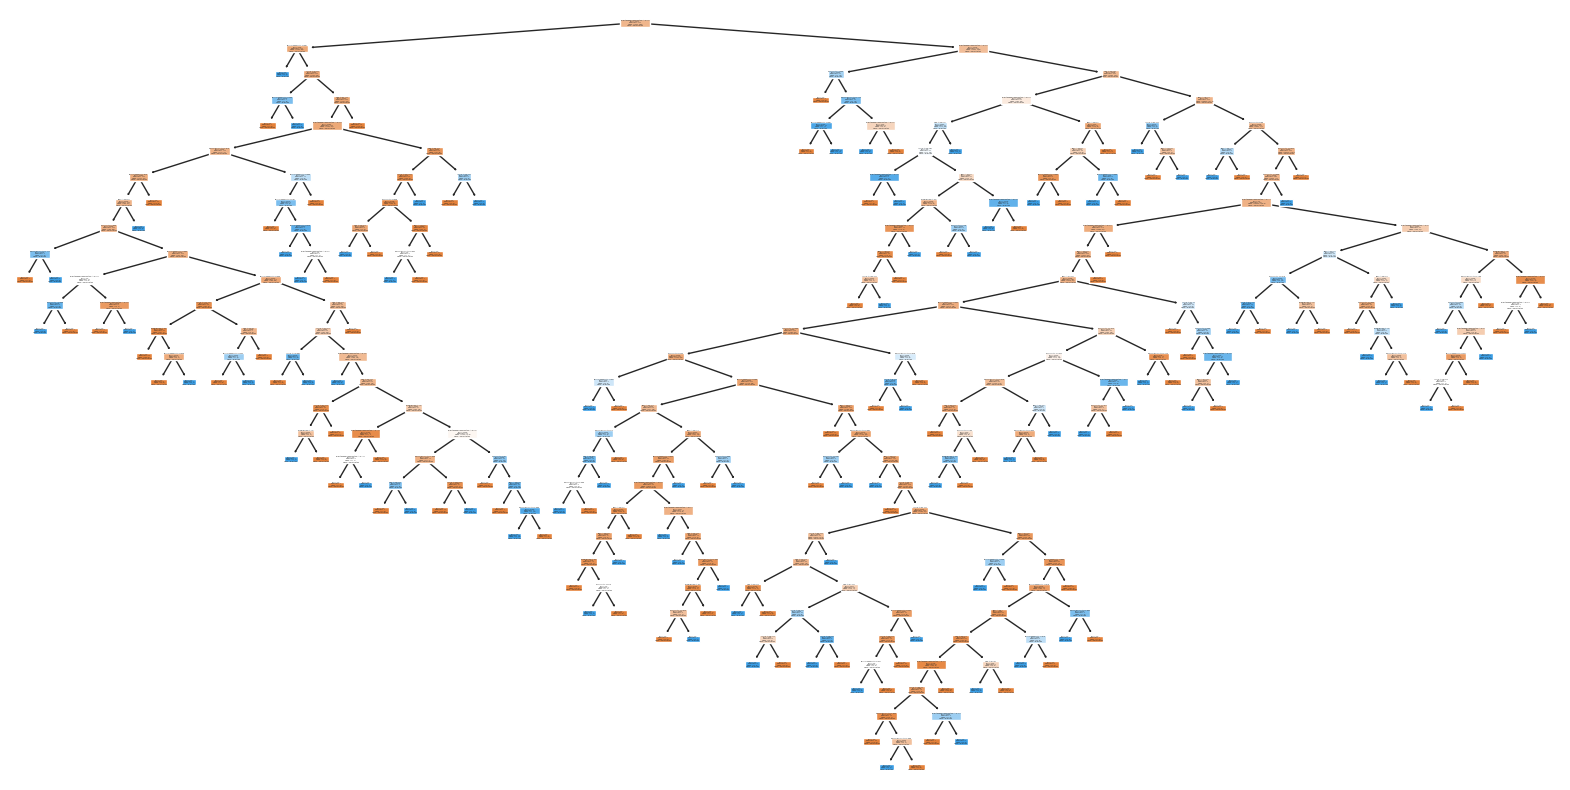

In [285]:
# Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split dataset into features and target variable
y = df['Diagnosis']
X = df.drop('Diagnosis', axis=1)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=87)

# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 62.37%
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       123
           1       0.41      0.24      0.30        63

    accuracy                           0.62       186
   macro avg       0.54      0.53      0.52       186
weighted avg       0.59      0.62      0.59       186

[[101  22]
 [ 48  15]]


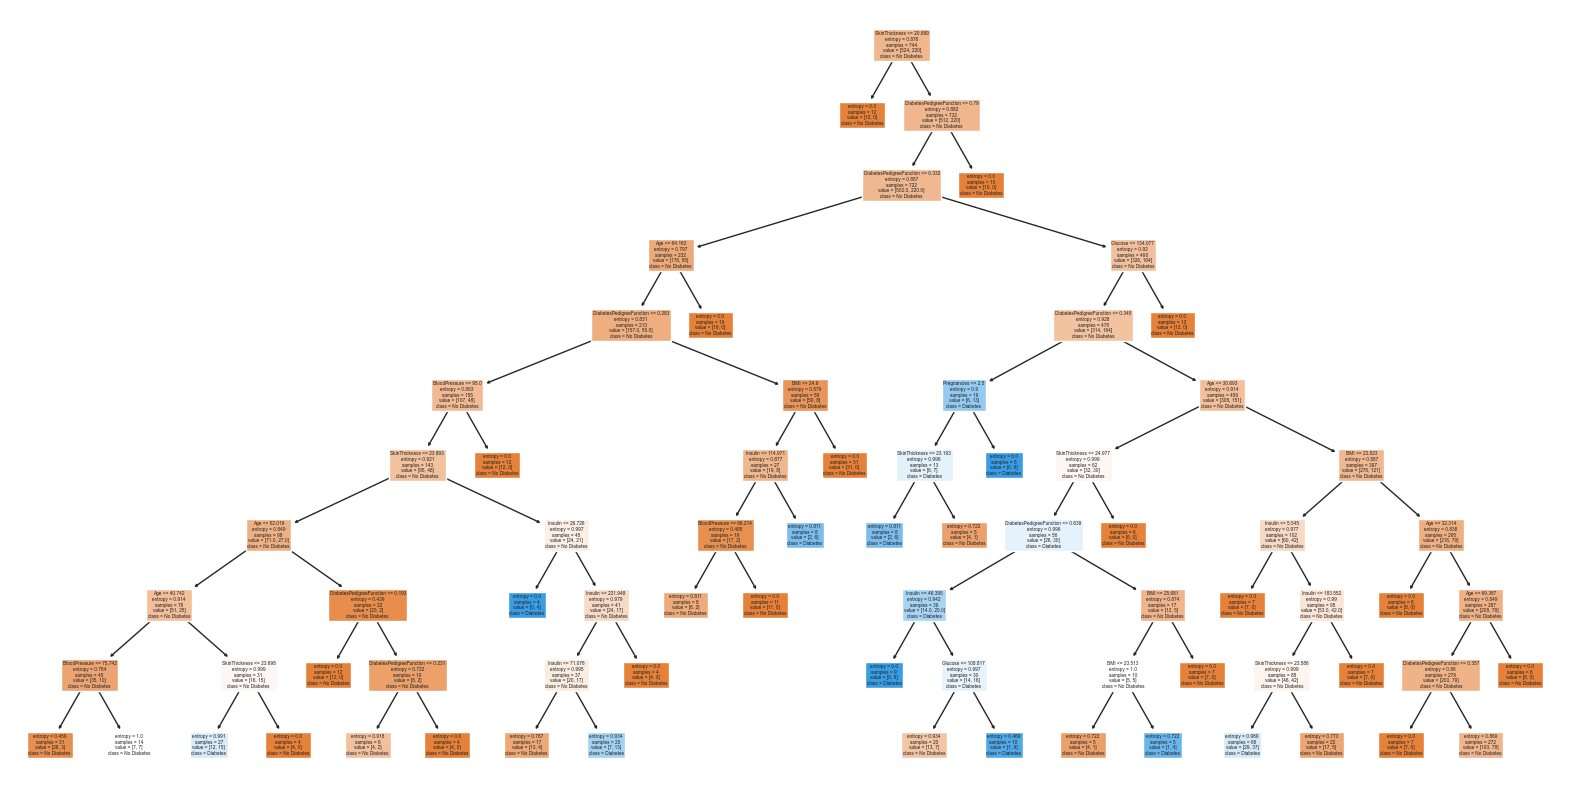

In [286]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# # Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
best_clf = grid_search.best_estimator_
plt.figure(figsize=(20,10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()


In [287]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize Random Forest classifier

clf = RandomForestClassifier(max_depth=10, random_state=87)


# Fit the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


Accuracy: 65.05%
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       123
           1       0.00      0.00      0.00        63

    accuracy                           0.65       186
   macro avg       0.33      0.49      0.39       186
weighted avg       0.43      0.65      0.52       186

[[121   2]
 [ 63   0]]


In [288]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize Random Forest classifier
clf = RandomForestClassifier(max_depth=10, random_state=87)

# Fit the model
clf.fit(X_train, y_train)

# Predictions on training data
y_pred_train = clf.predict(X_train)

# Predictions on testing data
y_pred_test = clf.predict(X_test)

# Accuracy for training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Accuracy for training data: {accuracy_train * 100:.2f}%')

# Accuracy for testing data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy for testing data: {accuracy_test * 100:.2f}%')

# Classification Report
print("Classification Report for testing data:")
print(classification_report(y_test, y_pred_test))

# Confusion Matrix
print("Confusion Matrix for testing data:")
print(confusion_matrix(y_test, y_pred_test))


Accuracy for training data: 91.40%
Accuracy for testing data: 65.05%
Classification Report for testing data:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       123
           1       0.00      0.00      0.00        63

    accuracy                           0.65       186
   macro avg       0.33      0.49      0.39       186
weighted avg       0.43      0.65      0.52       186

Confusion Matrix for testing data:
[[121   2]
 [ 63   0]]


In [313]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize XGBoost classifier
clf = XGBClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
Accuracy: 66.13%
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       123
           1       0.00      0.00      0.00        63

    accuracy                           0.66       186
   macro avg       0.33      0.50      0.40       186
weighted avg       0.44      0.66      0.53       186

[[123   0]
 [ 63   0]]


In [320]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=87)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize neural network model
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3, verbose=0)

# Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 67.38%
              precision    recall  f1-score   support

           0       0.67      0.99      0.80       187
           1       0.67      0.02      0.04        92

    accuracy                           0.67       279
   macro avg       0.67      0.51      0.42       279
weighted avg       0.67      0.67      0.55       279

[[186   1]
 [ 90   2]]


In [315]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

best_accuracy = 0
best_random_state = None

# Iterate over a range of random_state values
for random_state_value in range(1, 101):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state_value)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize neural network model
    model = keras.Sequential([
        keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3, verbose=0)

    # Evaluate the model
    y_pred_proba = model.predict(X_test)
    y_pred = (y_pred_proba > 0.5).astype(int).flatten()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Check if current model has higher accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state_value

# Print the best random_state and accuracy
print(f'Best Random State: {best_random_state}')
print(f'Best Accuracy: {best_accuracy * 100:.2f}%')


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Best Random State: 38
Best Accuracy: 73.48%


In [316]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize XGBoost classifier
clf = XGBClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV for XGBoost
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the XGBoost model
grid_search.fit(X_train, y_train)

# Best parameters for XGBoost
print("Best Parameters for XGBoost:", grid_search.best_params_)

# Predictions for XGBoost
y_pred_xgb = grid_search.predict(X_test)

# Accuracy for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb * 100:.2f}%')

# Classification Report for XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix for XGBoost
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=10000)  # Increased max_iter for convergence

# Fit the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Accuracy for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'\nLogistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%')

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.7}
XGBoost Accuracy: 66.13%
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       123
           1       0.00      0.00      0.00        63

    accuracy                           0.66       186
   macro avg       0.33      0.50      0.40       186
weighted avg       0.44      0.66      0.53       186

XGBoost Confusion Matrix:
[[123   0]
 [ 63   0]]

Logistic Regression Accuracy: 66.13%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       123
           1       0.00      0.00      0.00        63

    accuracy                           0.66       186
   macro avg       0.33      0.50      0.40       186
weighted avg       0.44      0.66      0.53       186

Logis

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packag

In [317]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize standard Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=10000)  # Increased max_iter for convergence

# Fit the Logistic Regression model
log_reg.fit(X_train, y_train)

# Predictions for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)

# Accuracy for Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg * 100:.2f}%')

# Classification Report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 66.13%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80       123
           1       0.00      0.00      0.00        63

    accuracy                           0.66       186
   macro avg       0.33      0.50      0.40       186
weighted avg       0.44      0.66      0.53       186

Logistic Regression Confusion Matrix:
[[123   0]
 [ 63   0]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [318]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Initialize Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model
clf.fit(X_train, y_train)

# Predictions for Decision Tree
y_pred = clf.predict(X_test)

# Accuracy for Decision Tree
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy * 100:.2f}%')

# Classification Report for Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 58.60%
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       123
           1       0.38      0.37      0.37        63

    accuracy                           0.59       186
   macro avg       0.53      0.53      0.53       186
weighted avg       0.58      0.59      0.58       186

Decision Tree Confusion Matrix:
[[86 37]
 [40 23]]


In [319]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

# Load data from CSV file
# file_path = './data/Diabetes_prediction.csv'
# df = pd.read_csv(file_path)

# Split dataset into features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Oversampling the minority class
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Initialize Decision Tree classifier with high variance
clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model
clf.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 51.08%
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       123
           1       0.29      0.30      0.29        63

    accuracy                           0.51       186
   macro avg       0.46      0.46      0.46       186
weighted avg       0.52      0.51      0.51       186

Confusion Matrix:
[[76 47]
 [44 19]]
